# Importamos las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Cargamos el dataset limpio para poder crear un DataFrame

In [2]:
df = pd.read_csv('data_limpio.csv')
df.head(5)

,Unnamed: 0,Descripcion,Precio,Reseñas,Precio Real,Dias sin cargo,Envio,Fecha de entrega,Ventas en meses pasados,Stock,Edad,Otro
0,0,Spider-Man Marvel Legends Series Across The Sp...,24,71,24.99,90,Ships to Bangladesh,"Tue, Jun 20",200,3,4,years and up
1,1,Spider-Man Marvel Legends Series Across The Sp...,22,55,14.99,90,Ships to Bangladesh,"Tue, Jun 20",200,3,4,years and up
2,2,Fisher-Price Little People Musical Toddler Toy...,7,2895,9.99,90,Ships to Bangladesh,"Tue, Jun 20",100,3,1,months - 5 years
3,3,CatToysOfficial - CAT Little Machines 5pcs Con...,5,2530,24.99,90,Ships to Bangladesh,"Tue, Jun 20",100,3,3,months - 6 years
4,4,Spider-Man Marvel Legends Series Across The Sp...,22,40,85.99,90,Ships to Bangladesh,"Tue, Jun 20",90,3,4,years and up


In [3]:
df.columns

Index(['Unnamed: 0', 'Descripcion', 'Precio', 'Reseñas', 'Precio Real',
       'Dias sin cargo', 'Envio', 'Fecha de entrega',
       'Ventas en meses pasados', 'Stock', 'Edad', 'Otro'],
      dtype='object')

Vemos que aparece en este DataFrame una columna que se llama 'Unnamed: 0' y otra que se llama 'Otro'. Como no nos sirven vamos a proceder a eliminarlas. Las mismas quedaron de la limpieza realizada anteriormente.

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.drop('Otro', axis=1, inplace=True)

Constatamos que se hayan eliminado las columnas en cuestión.

In [6]:
df.head(2)

,Descripcion,Precio,Reseñas,Precio Real,Dias sin cargo,Envio,Fecha de entrega,Ventas en meses pasados,Stock,Edad
0,Spider-Man Marvel Legends Series Across The Sp...,24,71,24.99,90,Ships to Bangladesh,"Tue, Jun 20",200,3,4
1,Spider-Man Marvel Legends Series Across The Sp...,22,55,14.99,90,Ships to Bangladesh,"Tue, Jun 20",200,3,4


Vamos a realizar un meta-análisis del dataset. Para elllo procederemos a crear dos listas. Una contendrá las columnas categóricas y la otra presentará las columnas numéricas.

In [7]:
categoricas = [i for i in df.columns if df[i].dtype=='object']
numericas = [i for i in df.columns if df[i].dtype=='int64' or df[i].dtype=='float64']

# Columnas numéricas

## La columna 'Precio'

Veamos cuál es el precio más alto presente en nuestro DataFrame

In [8]:
df['Precio'].max()

702

Sabemos que el precio más alto en nuestro DataFrame es de 702, veamos si refiere a más de un juguete o no, creando un DataFrame con el filtro del precio máximo.

In [9]:
df_precio_max = df[df['Precio']==702]
df_precio_max

,Descripcion,Precio,Reseñas,Precio Real,Dias sin cargo,Envio,Fecha de entrega,Ventas en meses pasados,Stock,Edad
10619,Infinity Studio x League of LegendsHallowed Se...,702,384,702.0,90,Ships to Bangladesh,"Tue, Jun 20",90,2,15


El precio máximo refiere sólo a un producto con 384 reseñas, que no presenta descuentos, del cuál se vendieron 90 unidades en los meses pasados, quedan 2 de ellas y la edad recomendada es a partir de los 15 años.

Observemos ahora el precio mínimo presente en nuestro DataFrame.

In [10]:
df['Precio'].min()

0

Llama la atención que el precio mínimo sea igual a 0. Vamos a filtrar los datos cuyo precio sea igual a 0.

In [11]:
df[df['Precio']==0]

,Descripcion,Precio,Reseñas,Precio Real,Dias sin cargo,Envio,Fecha de entrega,Ventas en meses pasados,Stock,Edad
9203,0,0,0,0.0,0,0,0,0,0,0


Esto podría deberse a un error a la hora de recolectar los datos. Como sólo se trata de una fila en DataFrame de 11403, vamos a proceder a eliminarla.

In [12]:
df.drop(index=9203, inplace=True)

Buscamos, nuevamente, cuál es el precio más bajo presente.

In [13]:
df['Precio'].min()

2

Este precio mínimo parece ser más coherente. Vamos a crear un DataFrame con este precio mínimo como filtro.

In [14]:
df_precio_min = df[df['Precio']==2]
df_precio_min

,Descripcion,Precio,Reseñas,Precio Real,Dias sin cargo,Envio,Fecha de entrega,Ventas en meses pasados,Stock,Edad
274,Funko Pop! MoviesBlack Adam - Cyclone,2,15461,12.99,90,Ships to Bangladesh,"Tue, Jun 20",90,8,4
478,Marvel BattleworldSeries 2 Treachery at Twilig...,2,1142,19.99,90,Ships to Bangladesh,"Tue, Jun 20",90,1,0
10213,Just Play The Umbrella Academy 3” Stylized Col...,2,384,2.00,90,Ships to Bangladesh,"Tue, Jun 20",90,3,12
11270,Miyuki HigurashiWhen They Cry – SOTSUHanyu 1:7...,2,32,2.00,90,Ships to Bangladesh,"Thu, Jun 22",100,1,0


In [15]:
for i in df_precio_min['Descripcion']:
    print(i)

Funko Pop! MoviesBlack Adam - Cyclone
Marvel BattleworldSeries 2 Treachery at Twilight Battle Ball
Just Play The Umbrella Academy 3” Stylized Collectible Figure- Diego, Multi-Color
Miyuki HigurashiWhen They Cry – SOTSUHanyu 1:7 Scale PVC Figure,Multicolor


Vemos que son cuatro juguetes los que tienen el precio más bajo. Cómo puede apreciarse, el rango etario va de los 0 a 12 años y el stock displonible de cada muñeco varía entre 1 unidad y 8.

Ahora vamos a crear una columna que nos indique el porcentaje de descuento aplicado sobre el producto, utilizando la columna del  'Precio Real' y la de 'Precio'.

In [16]:
df_precio_min['Porcentaje de descuento'] = round(((100*(df_precio_min['Precio Real']-df_precio_min['Precio']))/df['Precio Real']), 2)

C:\Users\usuario\AppData\Local\Temp\ipykernel_9488\1533223932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_precio_min['Porcentaje de descuento'] = round(((100*(df_precio_min['Precio Real']-df_precio_min['Precio']))/df['Precio Real']), 2)


In [17]:
df_precio_min

,Descripcion,Precio,Reseñas,Precio Real,Dias sin cargo,Envio,Fecha de entrega,Ventas en meses pasados,Stock,Edad,Porcentaje de descuento
274,Funko Pop! MoviesBlack Adam - Cyclone,2,15461,12.99,90,Ships to Bangladesh,"Tue, Jun 20",90,8,4,84.60
478,Marvel BattleworldSeries 2 Treachery at Twilig...,2,1142,19.99,90,Ships to Bangladesh,"Tue, Jun 20",90,1,0,89.99
10213,Just Play The Umbrella Academy 3” Stylized Col...,2,384,2.00,90,Ships to Bangladesh,"Tue, Jun 20",90,3,12,0.00
11270,Miyuki HigurashiWhen They Cry – SOTSUHanyu 1:7...,2,32,2.00,90,Ships to Bangladesh,"Thu, Jun 22",100,1,0,0.00


Lo interesante es que, entre los productos con el precio más bajo, podemos encontrar porcentajes de descuento superiores al 84%. Es decir, tales productos están en una rebaja interesante, una verdadera oportunidad para un cliente potencial.

Ahora bien, el código anterior podemos aplicarlo a todo el DataFrame y analizar los descuentos del mismo.

In [18]:
df['Porcentaje de descuento'] = round(((100*(df['Precio Real']-df['Precio']))/df['Precio Real']), 2)

Vemos que se aplicó la nueva columna

In [19]:
df.head(2)

,Descripcion,Precio,Reseñas,Precio Real,Dias sin cargo,Envio,Fecha de entrega,Ventas en meses pasados,Stock,Edad,Porcentaje de descuento
0,Spider-Man Marvel Legends Series Across The Sp...,24,71,24.99,90,Ships to Bangladesh,"Tue, Jun 20",200,3,4,3.96
1,Spider-Man Marvel Legends Series Across The Sp...,22,55,14.99,90,Ships to Bangladesh,"Tue, Jun 20",200,3,4,-46.76


Las primeras dos filas de este DataFrame en la columna creada nos indican algunas pistas a tener en cuenta. Podemos ver que tenemos porcentajes positivos y negativos. A grandes rasgos encontraríamos tres categorías de porcentajes: i) aquellos productos a los que se les aplicó un descuento (porcentaje positivo mayor a 0), ii) los que aumentaron de precio (porcentaje negativo) y iii) los que permanecieron iguales (porcentaje igual a 0). Vamos a proceder a filtrar el DataFrame siguiendo los criterios anteriores.

Para facilitar las cosas vamos a crear vamos a crear una función que filtre el DataFrame.

In [20]:
#La función va a tomar tres argumentos: un dataframe, el nombre de la columna
#sobre la cual aplicar el filtro y la condición (mayor, menor o igual a cero)
def funcion_filtro(df, nombre_col, condicion):
    if condicion.lower() == 'igual a cero':
        df_filtrado = df[df[nombre_col]==0]
    elif condicion.lower() == 'mayor a cero':
        df_filtrado = df[df[nombre_col]>0]
    else:
        df_filtrado == df[df[nombre_col]<0]
    return df_filtrado

Filtramos el DataFrame para aquellas columnas cuyo descuento sea igual a 0.

In [21]:
sin_descuento = funcion_filtro(df, 'Porcentaje de descuento', 'igual a cero')

Confirmamos que se haya aplicado el filtro.

In [22]:
sin_descuento.head(2)

,Descripcion,Precio,Reseñas,Precio Real,Dias sin cargo,Envio,Fecha de entrega,Ventas en meses pasados,Stock,Edad,Porcentaje de descuento
17,"Gabby's Dollhouse, Deluxe Figure Gift Set with...",22,579,22.0,90,Ships to Bangladesh,"Tue, Jun 20",100,3,11,0.0
18,Transformers Toys Heroic Optimus Prime Action ...,20,10204,20.0,90,Ships to Bangladesh,"Tue, Jun 20",100,3,0,0.0


Observamos cuántos artículos únicos no tienen descuento. Para ello vamos a utilizar la columna 'Descripción'.

In [23]:
sin_descuento['Descripcion'].nunique()

4900

Un elemento a analizar son las ventas en meses pasados que tuvieron estos artículos sin descuento.

Observamos cuántos artículos tuvieron x cantidad de ventas.

In [24]:
for i in sin_descuento['Ventas en meses pasados'].unique():
    cantidad_articulos = len(sin_descuento[sin_descuento['Ventas en meses pasados']==i])
    print(f'{cantidad_articulos} artículos tuvieron {i} ventas en los meses pasados', end='\n'*2)

360 artículos tuvieron 100 ventas en los meses pasados

173 artículos tuvieron 50 ventas en los meses pasados

6098 artículos tuvieron 90 ventas en los meses pasados

10 artículos tuvieron 200 ventas en los meses pasados



Veamos cuál fue el máximo nivel de ventas en los meses pasados de los artículos sin descuento.

In [25]:
sin_descuento['Ventas en meses pasados'].max()

200

Observemos el mínimo nivel de ventas en los meses pasados de estos mismos artículos.

In [26]:
sin_descuento['Ventas en meses pasados'].min()

50

Podemos observar que los artículos sin descuento vendieron entre 50-200 unidades en los meses pasados.

Procedamos a ver los precios de los artículos sin descuento.

In [27]:
minimo = sin_descuento['Precio'].min()
maximo = sin_descuento['Precio'].max()
print(f'El precio mínimo es de ${minimo}, mientras que el máximo es de ${maximo}')

El precio mínimo es de $2, mientras que el máximo es de $702


Graficamos un histograma para observar dónde se encuentran la mayor cantidad de precios sin descuento.

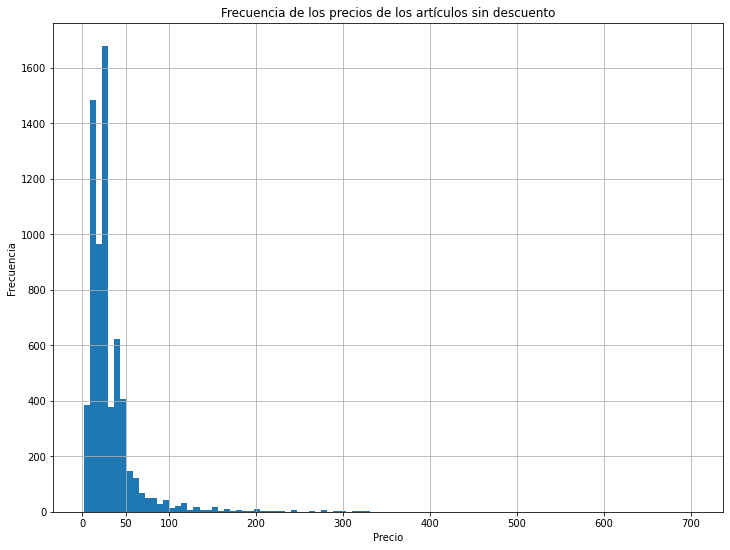

In [28]:
sin_descuento['Precio'].hist(bins=100, figsize=(12, 9))
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de los precios de los artículos sin descuento')
plt.xticks([0, 50, 100, 200, 300, 400, 500, 600, 700])
plt.show()

La mayor cantidad de precios sin descuento se encuentran entre los &#36;0 y los &#36;50.

Ahora vamos a realizar un análisis semejante con la columna 'Stock'.

Veamos el total de artículos sin descuento que se presentan.

In [29]:
sin_descuento['Stock'].sum()

39714

Observemos los artículos que tienen mayor stock.

In [30]:
sin_descuento[sin_descuento['Stock']==sin_descuento['Stock'].max()]

,Descripcion,Precio,Reseñas,Precio Real,Dias sin cargo,Envio,Fecha de entrega,Ventas en meses pasados,Stock,Edad,Porcentaje de descuento
3354,NEW RAY TOYS Polaris Scale Model,17,414,17.0,90,Ships to Bangladesh,"Tue, Jun 20",90,20,16,0.0
3355,Marvel Legends Series Disney Plus Ms MCU Serie...,16,303,16.0,90,Ships to Bangladesh,"Tue, Jun 20",90,20,0,0.0
3356,Roblox Avatar Shop Series Collection - Level 2...,9,948,9.0,90,Ships to Bangladesh,"Tue, Jun 20",90,20,15,0.0
3357,Terra by Battat – Bunny Hutch – Bunny Rabbit T...,10,4,10.0,90,Ships to Bangladesh,"Tue, Jun 20",90,20,0,0.0
3358,"Calico Critters Floating Cloud Rainbow Train, ...",24,630,24.0,90,Ships to Bangladesh,"Tue, Jun 20",90,20,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11140,Orange Rouge Burning KabaddiTatsuya Yoigoshi N...,28,78,28.0,90,Ships to Bangladesh,"Tue, Jun 20",100,20,0,0.0
11141,"Teenage Mutant Ninja Turtles 5"" Sewer Shredder...",10,78,10.0,90,Ships to Bangladesh,"Tue, Jun 20",100,20,0,0.0
11142,"Schleich Wild Life, Wild Animal Toys for Kids,...",42,78,42.0,90,Ships to Bangladesh,"Tue, Jun 20",100,20,0,0.0
11143,"Schleich bayala, 5-Piece Starter Set with Fair...",34,78,34.0,90,& Up,"Tue, Jun 20",100,20,18,0.0


Por la cantidad de filas, sabemos que son 211 los artículos sin descuento con mayor stock.

De estos artículos que tienen una mayor cantidad de Stock podríamos analizar dos cosas: 1. el precio y 2. las ventas en meses pasados.

Comencemos con lo primero, veamos dónde se encuentra la mayor cantidad de precios de los artículos sin descuento con la mayor cantidad de stock.

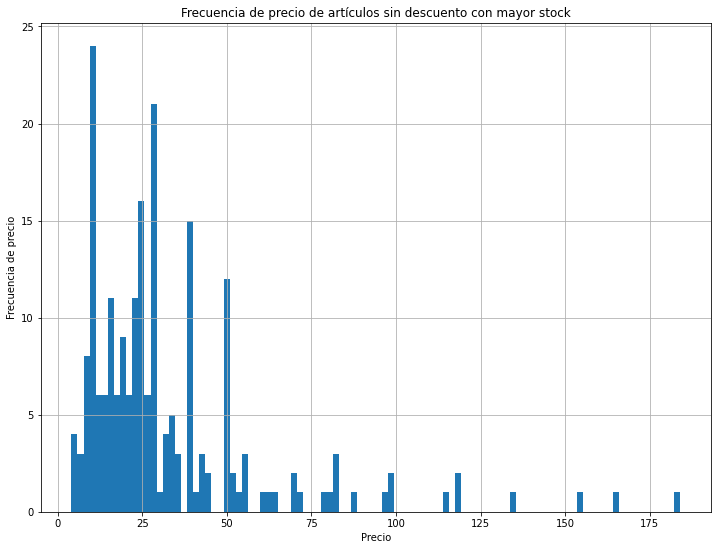

In [31]:
sin_descuento.loc[sin_descuento['Stock']==sin_descuento['Stock'].max(), 'Precio'].hist(bins=100, figsize=(12,9))
plt.xlabel('Precio')
plt.ylabel('Frecuencia de precio')
plt.title('Frecuencia de precio de artículos sin descuento con mayor stock')
plt.show()

De los artículos sin descuento podemos observar que aquellos que tienen un stock mayor su precio se encuentra en el rango de los &#36;2 a &#36;25 aproximadamente.

Veamos las ventas en meses pasados que tuvieron estos artículos sin descuento con mayor stock.

In [46]:
sin_descuento.loc[sin_descuento['Stock']==sin_descuento['Stock'].max(), 'Ventas en meses pasados'].value_counts()

90     173
100     38
Name: Ventas en meses pasados, dtype: int64

Esto llama la atención, ya que a pesar de ser los artículos con mayor stock dentro de las unidades sin descuento, las ventas en meses pasado no estuvieron mal. Por un lado, tenemos aquellos juguetes que tuvieron 90 ventas en meses pasados y, por el otro, los que tuvieron 100.

Analicemos ahora los artículos sin descuento con menor stock. Vamos a proceder de la misma manera que en el caso anterior,

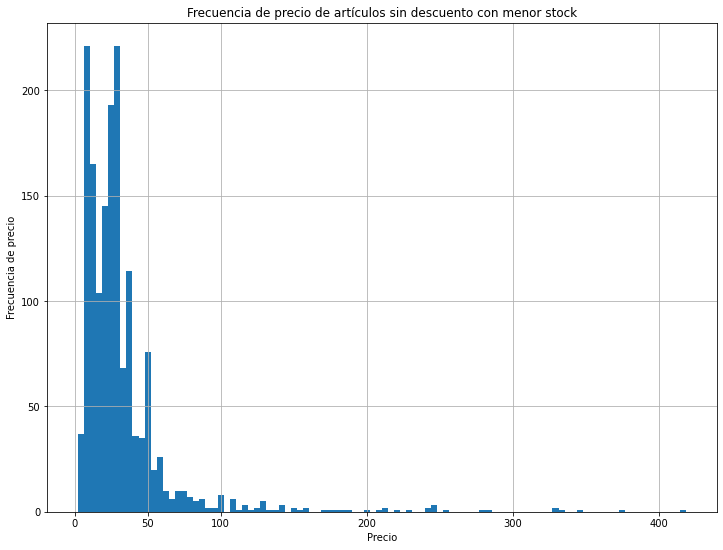

In [51]:
sin_descuento.loc[sin_descuento['Stock']==sin_descuento['Stock'].min(), 'Precio'].hist(bins=100, figsize=(12,9))
plt.xlabel('Precio')
plt.ylabel('Frecuencia de precio')
plt.title('Frecuencia de precio de artículos sin descuento con menor stock')
plt.xticks([0, 50, 100, 200, 300, 400])
plt.show()

En este caso, el rango de precio de los artículos sin descuento con mayor stock se encuentra entre los &#36;2 y &#36;50.

Respecto de las ventas en meses pasados obtenemos:

In [53]:
sin_descuento.loc[sin_descuento['Stock']==sin_descuento['Stock'].min(), 'Ventas en meses pasados'].value_counts()

90     1457
100     101
50       12
200      10
Name: Ventas en meses pasados, dtype: int64

Aquí se pueden apreciar números más favorables. Los artículos sin descuento con stock reducido presentan, incluso, 200 ventas en meses pasados. Aunque, este caso es el menos prioritario.